Seja bem vindo a Avaliação para Engenheiro de Dados - Data Sprints 2020

Desenvolvido por Henrique Nunweiler - LinkedIn https://www.linkedin.com/in/henrique-nunweiler

Segue abaixo a descrição do que será desenvolvido:

1.   Qual a distância média percorrida por viagens com no máximo 2 passageiros; 
2.   Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado;
3.   Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro.


---








In [4]:
# Importando Bibliotecas e Assistentes
import pandas as pd
import datetime
#from google.colab import drive
#drive.mount('/content/gdrive')
import matplotlib.pyplot as plt
from matplotlib import style

In [6]:
# Importando arquivos para tratamento - Arquivos .csv #
paymentData = pd.read_csv('data/payments.csv')
vendorsData = pd.read_csv('data/vendors.csv')

# Importando arquivos para tratamento - Massa de Dados #
data2009 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2009-json_corrigido.json',lines=True)
data2010 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2010-json_corrigido.json',lines=True)
data2011 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2011-json_corrigido.json',lines=True)
data2012 = pd.read_json('https://s3.amazonaws.com/data-sprints-eng-test/data-sample_data-nyctaxi-trips-2012-json_corrigido.json',lines=True)

In [7]:
#Verificando o Status dos Arquivos da Massa de Dados
data2009.head()
data2010.head()
data2011.head()
data2012.head()

# Verificando o Status dos Arquivos .csv
paymentData.head()
vendorsData.head()

,vendor_id,name,address,city,state,zip,country,contact,current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


In [8]:
# Concatenar tabelas em uma única variável
carregamentoAnos = [data2009,data2010,data2011,data2012]

# Concatenando e transformando o dataset para criar a variável 'trips' que será utilizada a seguir
trips = pd.concat(carregamentoAnos,ignore_index=True,sort=True)

# Conferindo resultado da concatenação
trips.head()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,surcharge,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2009-04-21T18:57:09.433767+00:00,40.747950,-73.994712,5.4,2,Cash,2009-04-21T18:51:11.767205+00:00,40.742950,-74.004114,NaN,NaN,0.0,0.0,0.0,5.4,0.80,CMT
1,2009-01-13T07:50:36.386011+00:00,40.792385,-73.940449,15.4,1,Cash,2009-01-13T07:40:07.639754+00:00,40.747784,-73.996506,NaN,NaN,0.0,0.0,0.0,15.4,5.40,CMT
2,2009-01-06T19:43:09.908429+00:00,40.768108,-73.944535,6.1,5,CASH,2009-01-06T19:30:44.142187+00:00,40.752070,-73.951340,NaN,NaN,1.0,0.0,0.0,7.1,1.67,VTS
3,2009-09-24T08:41:56.739991+00:00,40.721812,-73.958122,12.9,1,CASH,2009-09-24T08:28:09.004451+00:00,40.729128,-74.001117,NaN,NaN,0.5,0.0,0.0,13.4,4.13,VTS
4,2009-10-29T05:57:22.880174+00:00,40.776075,-73.979757,7.7,1,CASH,2009-10-29T05:50:39.214629+00:00,40.756873,-73.976600,NaN,NaN,0.5,0.0,0.0,8.2,2.03,VTS


In [21]:
# Criar função de quebra de data e hora
def funcConverteData(date_time):
  # Delimitador de Data '-'
  date_time = date_time.split('-')

 year = int(date_time[0])
 month = int(date_time[1])
 day = int(date_time[2][0:2]) 
  
  # Delimitador de Hora ':'
  time = date_time[2][4:].split(':')

  hour = int(time[0])
  minu = int(time[1])
  sec = int(time[2][:2])

  # Retorno de DateTime convertido
  return datetime.datetime(year,month,day,hour,minu,sec)

IndentationError: ignored

In [19]:
# Executar funções de data para quebras

funcConverteData(trips.pickup_datetime[0])
trips.pickup_datetime = trips.pickup_datetime.apply(funcConverteData)
trips.dropoff_datetime = trips.dropoff_datetime.apply(funcConverteData)

AttributeError: ignored

In [22]:
# Importar biblioteca para arrays multidimensionais
import numpy as  num

Pergunta 1: Distância média percorrida por viagens com no máximo dois passageiros?

 

In [13]:
mediaPassageiros = num.mean(trips.loc[trips.passenger_count <= 2,'trip_distance'])
mediaPassageiros

2.6625269962030926

Pergunta 2: Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado?

 

In [13]:
maioresVendors = trips.groupby(trips.vendor_id).total_amount.sum().sort_values(ascending=False)
maioresVendors

vendor_id
CMT    1.954908e+07
VTS    1.904343e+07
DDS    2.714902e+06
TS     4.560000e+01
Name: total_amount, dtype: float64

Pergunta 3: Histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro.

In [28]:
# Filtrando os dados
tripsAmostra = trips.loc[trips.passenger_count <= 2]
tripsAmostra = tripsAmostra.loc[tripsAmostra.payment_type == 'CASH']
tripsAmostra.head

<bound method NDFrame.head of            dropoff_datetime  dropoff_latitude  ...  trip_distance  vendor_id
3       2009-09-24 08:41:56         40.721812  ...           4.13        VTS
4       2009-10-29 05:57:22         40.776075  ...           2.03        VTS
5       2009-10-23 07:23:51         40.750478  ...           1.15        VTS
6       2009-03-30 09:47:12         40.774042  ...           8.61        VTS
8       2009-03-30 03:32:11         40.761585  ...           1.04        VTS
...                     ...               ...  ...            ...        ...
3999970 2012-06-08 00:31:43         40.747165  ...           0.93        VTS
3999974 2012-07-11 04:00:30         40.778577  ...           0.40        DDS
3999975 2012-07-09 04:27:48         40.745015  ...           2.00        DDS
3999976 2012-06-29 01:16:01         40.782703  ...           1.40        DDS
3999987 2012-01-22 01:09:00         40.780963  ...           0.80        DDS

[1261976 rows x 17 columns]>

No handles with labels found to put in legend.


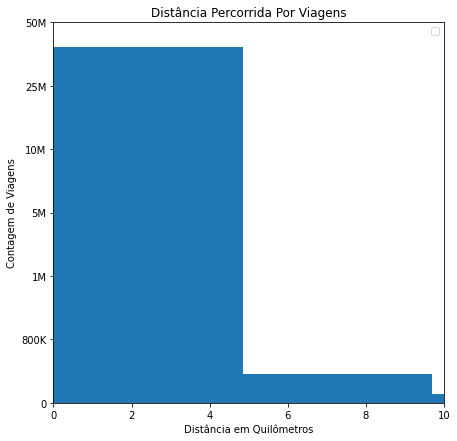

In [27]:
# Gerando o Histograma
plt.subplots(figsize=(7,7))
plt.hist(tripsAmostra.loc[tripsAmostra.passenger_count <= 2,'trip_distance'])
plt.xlim((0,10))
plt.yticks(list(range(0,1200001,200000)) , ['0','200K','400K','600K','800K','1M','5M','10M','25M','50M'])
plt.xlabel('Distância em Quilômetros')
plt.ylabel('Contagem de Viagens')
plt.title('Distância Percorrida Por Viagens')
plt.legend()
plt.show()